# Exploratory Data analysis
## Our goal is to predict the location of the gate that is on the image. If the gate is not fully visible than we will need to inform the user that the gate is not fully visible. The main purpose of this EDA is to analyse the data that we have and see if there are any problems with the data that we will need to solve later. Also the analysis of the data will help us in deciding how we should aproach a given problem
### Part 1 - import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [2]:
DIR_DATA = '../data'
COLUMN_NAMES = ['detected', 'center_x', 'center_y', 'width', 'height']

In [3]:
images = []
info_images = pd.DataFrame(columns=COLUMN_NAMES)

for file in glob.glob(os.path.join(DIR_DATA, '*.jpg')):
    images.append(cv2.imread(file))
    # Read txt file corresponding to read image
    with open(file.replace("jpg", "txt")) as f:
        data = f.readline().split()
        data = dict(zip(COLUMN_NAMES, data))
        info_images = info_images.append(data, ignore_index=True)

In [4]:
images = np.array(images)
images.shape

(1023, 500, 800, 3)

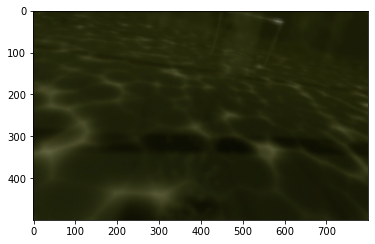

In [5]:
plt.imshow(images[0])
plt.show()

In [6]:
info_images.head()

,detected,center_x,center_y,width,height
0,1,0.6085783,0.15294445,0.28268027,0.37275428
1,1,0.68050265,0.35669196,0.3712743,0.45447853
2,1,0.55228364,0.29285598,0.2624132,0.6406761
3,1,0.60166967,0.35976404,0.10969764,0.18238437
4,1,0.48193815,0.0,0.7866074,2.4860177


In [7]:
info_images['detected'].value_counts()

1    1023
Name: detected, dtype: int64

We can notice a few important things from loading the data:
1. We have 1023 images. That is not a lot. We may be forced to use data augmentation techniques (transpose, rotation etc.) to improve the performance of our model
2. All images have shape of 500 x 800 pixels. That's a good thing because we won't be forced to reshape images so that they would fit our model
3. We will need to analyse how exactly center_x, center_y, width and height correspond to the image. We can see that the values are between 0 and 1. It may be possible that these values were divided by the width and height of the image but we will need to check that out
4. We can see / partially see a box on every image. That's a good and a bad thing at the same time because on one hand we won't be forced to analyse the case where there is no gate visible but on the other hand it would be a good idea to include the fact that the robot won't always see the gate in our analysis

### Part 2 - analyse data